In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')

In [3]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
# Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, 
# Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

#R – Runs scored: number of times a player crosses home plate
#AB – At bat: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction
#H – Hit: reaching base because of a batted, fair ball without error by the defense
#2B – Double: hits on which the batter reaches second base safely without the contribution of a fielding error
#3B – Triple: hits on which the batter reaches third base safely without the contribution of a fielding error
#HR – Home runs: hits on which the batter successfully touched all four bases, without the contribution of a fielding error
#BB – Base on balls (also called a "walk"): hitter not swinging at four pitches called out of the strike zone and awarded first base.
#SB – Stolen base: number of bases advanced by the runner while the ball is in the possession of the defense
#


In [36]:
# Output: Number of predicted wins (W)

# W – Win: number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work (also related: winning percentage)

In [6]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [7]:
# Total features are 17, out of which 1 is float type and remaining are integer.
# No null values are present in tha dataset
# Total records are 30

In [8]:
df.shape

(30, 17)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
W,30.0,80.966667,10.453455,63.00,74.0000,81.000,87.75,100.00
R,30.0,688.233333,58.761754,573.00,651.2500,689.000,718.25,891.00
AB,30.0,5516.266667,70.467372,5385.00,5464.0000,5510.000,5570.00,5649.00
H,30.0,1403.533333,57.140923,1324.00,1363.0000,1382.500,1451.50,1515.00
2B,30.0,274.733333,18.095405,236.00,262.2500,275.500,288.75,308.00
3B,30.0,31.300000,10.452355,13.00,23.0000,31.000,39.00,49.00
HR,30.0,163.633333,31.823309,100.00,140.2500,158.500,177.00,232.00
BB,30.0,469.100000,57.053725,375.00,428.2500,473.000,501.25,570.00
SO,30.0,1248.200000,103.759470,973.00,1157.5000,1261.500,1311.50,1518.00
SB,30.0,83.500000,22.815225,44.00,69.0000,83.500,96.50,134.00


In [11]:
# Target variable is W
df.W.unique()

array([ 95,  83,  81,  76,  74,  93,  87,  80,  78,  88,  86,  85,  68,
       100,  98,  97,  64,  90,  71,  67,  63,  92,  84,  79], dtype=int64)

In [13]:
# this is Regression problem sothat we have to precit the total number of wins by a team

<AxesSubplot:xlabel='W', ylabel='Density'>

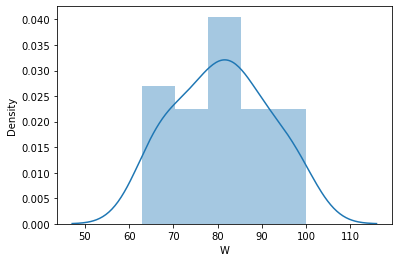

In [15]:
#Analyse Target variable first
sns.distplot(df.W)


In [16]:
# seems normal distribution

<AxesSubplot:xlabel='W', ylabel='Count'>

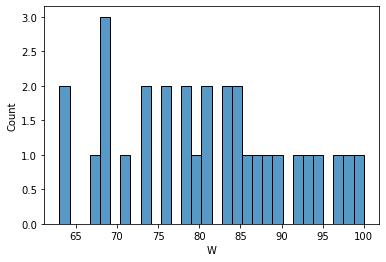

In [21]:
sns.histplot(df.W, bins=30)

In [22]:
# Wins depends on various features, we need to find the relation

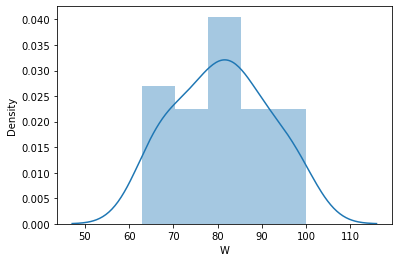

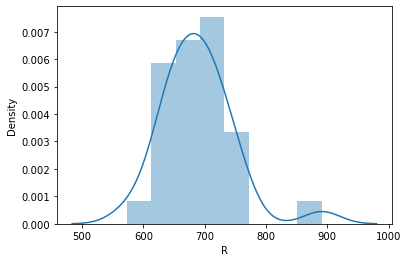

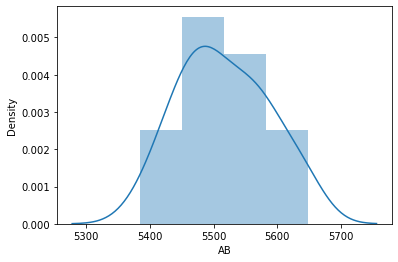

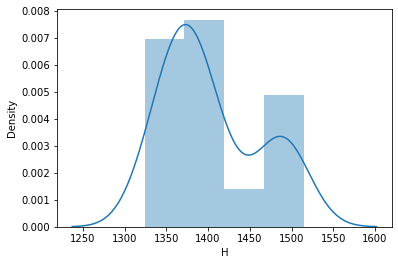

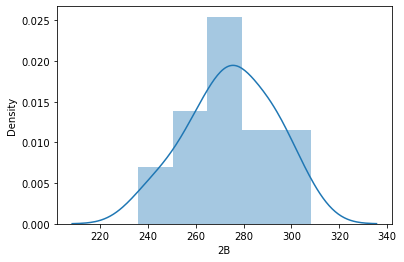

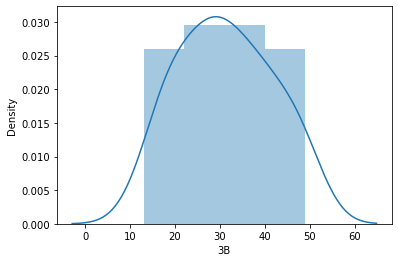

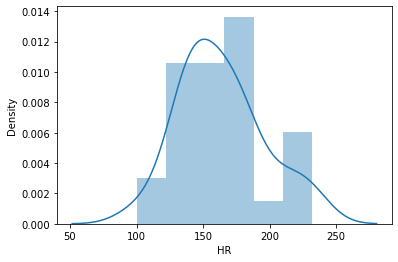

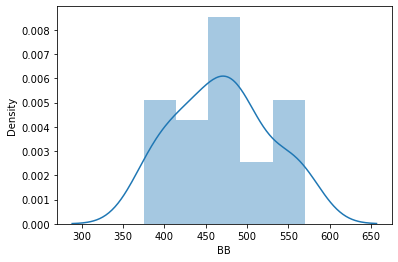

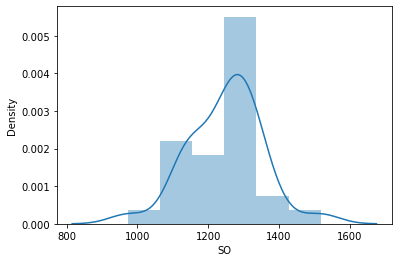

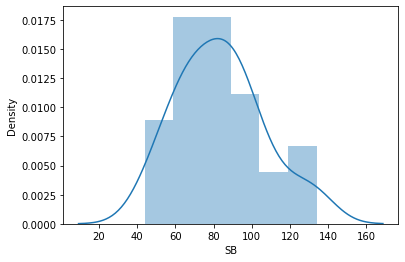

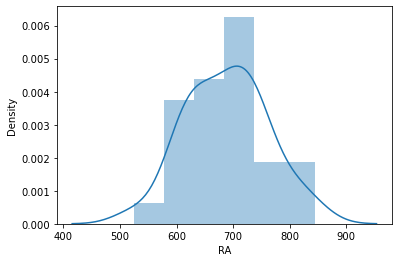

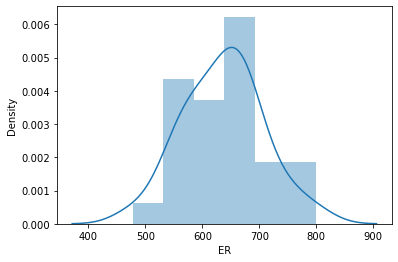

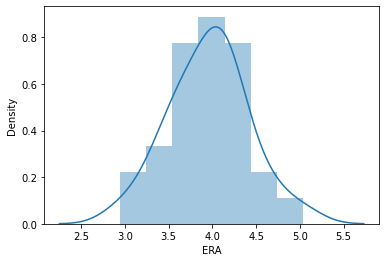

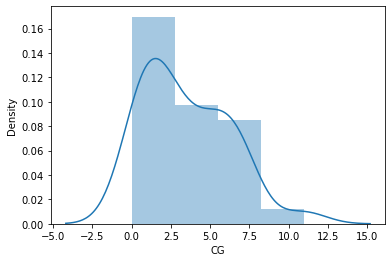

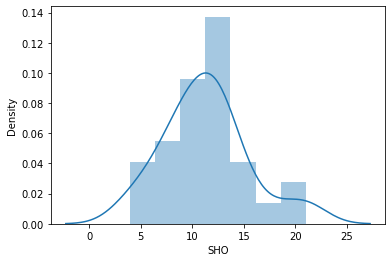

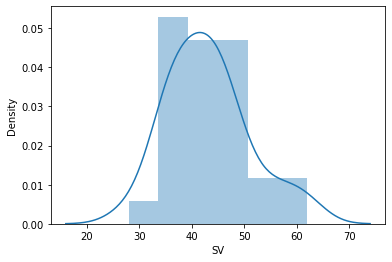

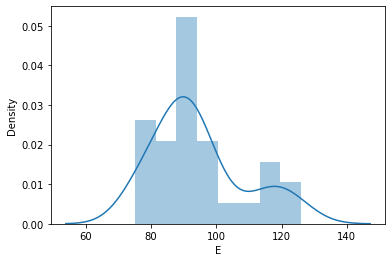

In [23]:
# First of all lets see the distrivution of all features

for i in df.columns:
    sns.distplot(df[i])
    plt.show()

In [24]:
# R  -  is right skewed data and 2 peaks
# AB  - kinf od normal distribution
# H - Bipolar distributed data
#2B  - lil bit left skewed data
#3B  - kind of normal distribution
# HR - some skewness on both side
#BB  - also have sort of skewness on both side
# SO  - skewed data on both sides
#SB right side skewed
#RA - skewed data
# ER  - lil skewed data
# ERA - Skewed on both side
# CG - not normal distributed data
#  SHO= not noprmal distributed
#SV - right skewed
#E Bipolar data

# Null check

In [25]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

<AxesSubplot:>

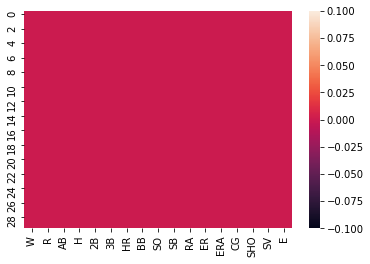

In [28]:
sns.heatmap(df.isna())

<AxesSubplot:>

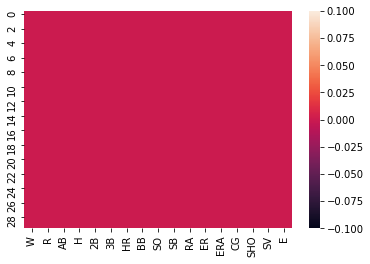

In [29]:
sns.heatmap(df.isnull())

In [30]:
# No Null values presented

# Correlation()

In [31]:
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


In [63]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [72]:
df=df[[ 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E','W']]

<AxesSubplot:>

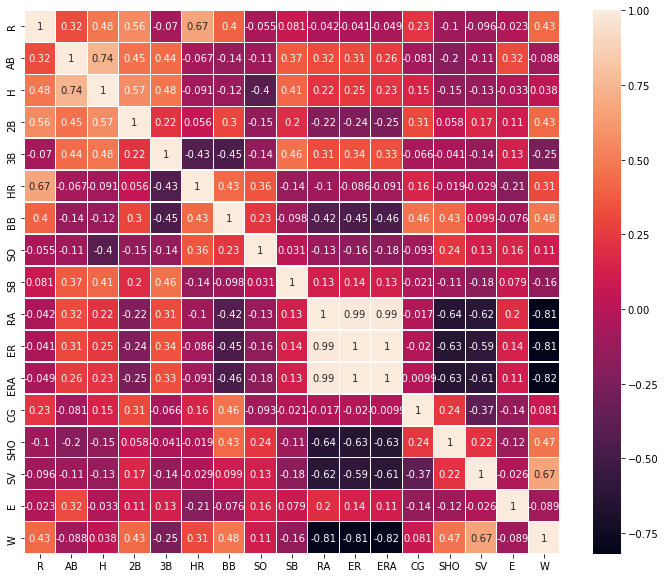

In [73]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,linecolor='white',linewidths=.25)

In [74]:
# Correlation analysis, First independent vs dependent

# R,HR,2B,BB,SHO, SV  is good correlated with target variable (W)

# AB, H, 3B, SO,SB,CG,E  are low correlated with target variable (+ and -)

# RA, ER, ERA  are highly negative correlated, we have to further check to drop any of them.


In [75]:
# RA, ER, ERA  are highly correlated to each other. these feature can bios the result. we have to take decicion on them.

In [76]:
# AB and H are strong correlated to each other 74%

# EDA

In [77]:
df.columns

Index(['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA',
       'CG', 'SHO', 'SV', 'E', 'W'],
      dtype='object')

<AxesSubplot:xlabel='R', ylabel='W'>

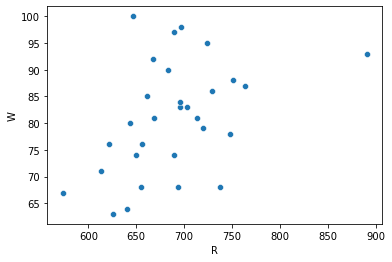

In [78]:
# Runs scored vs Win
sns.scatterplot('R','W',data=df)

In [80]:
# sns.relplot(x="R", y="W", data=df);

In [81]:
# Run scored have positive graph with Winds,  more the run, more chances toi WIN

<AxesSubplot:xlabel='AB', ylabel='W'>

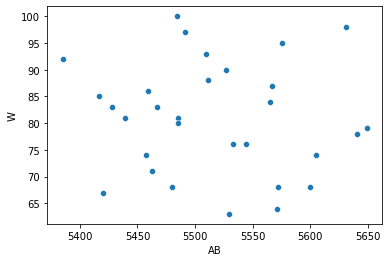

In [82]:
# AB vs Win

sns.scatterplot('AB','W',data=df)

In [83]:
# Data distribution is not in any direction, distributed everywhere, it wnt help to find chances to win, low correlated

<AxesSubplot:xlabel='H', ylabel='W'>

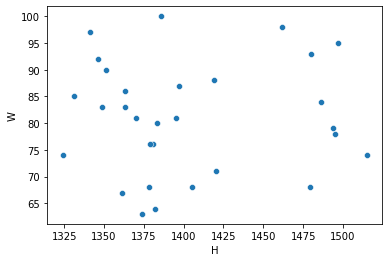

In [84]:
#  H vs win

sns.scatterplot('H','W',data=df)

In [85]:
# data distribution not in any directioon, low correlated with Win  .038, we can drop this feature, this is very low correelation. it will not help to 
# predict the win.

<AxesSubplot:xlabel='2B', ylabel='W'>

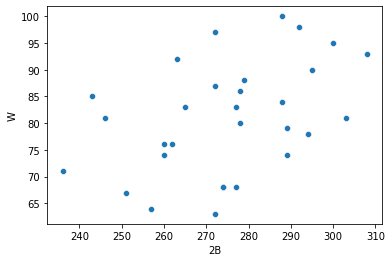

In [86]:
#  2B vs WIN

sns.scatterplot('2B','W',data=df)

In [87]:
# Positive correlated graph.  more 2B, more chances to win

<AxesSubplot:xlabel='3B', ylabel='W'>

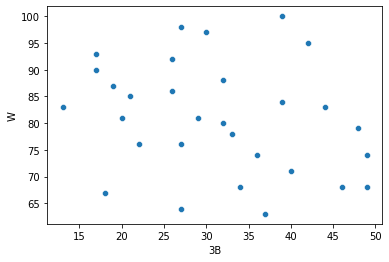

In [88]:
# 3B vs WIN

sns.scatterplot('3B','W',data=df)

In [89]:
# this distributin is low correlated, it wnt help to predict WIN more

<AxesSubplot:xlabel='HR', ylabel='W'>

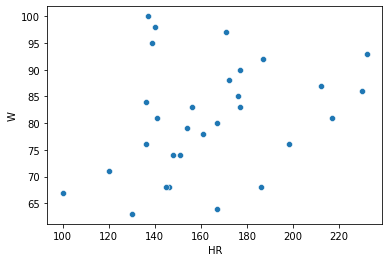

In [90]:
# HR vs WIN

sns.scatterplot('HR','W',data=df)

In [91]:
# Positive correlated

In [92]:
df.columns

Index(['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA',
       'CG', 'SHO', 'SV', 'E', 'W'],
      dtype='object')

<AxesSubplot:xlabel='BB', ylabel='W'>

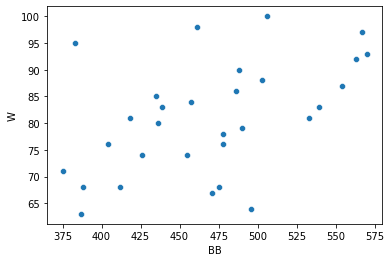

In [94]:
# BB vs win
sns.scatterplot('BB','W',data=df)

In [95]:
# positive correlated  Base on Ball

<AxesSubplot:xlabel='SO', ylabel='W'>

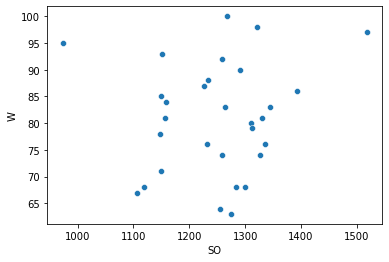

In [96]:
# SO vs WIN

sns.scatterplot('SO','W',data=df)

In [97]:
# low positive correlated

<AxesSubplot:xlabel='SB', ylabel='W'>

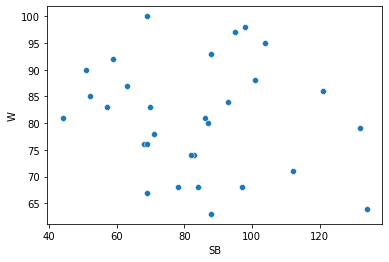

In [98]:
# SB vs win

sns.scatterplot('SB','W',data=df)

In [99]:
#  negative low correlated

<AxesSubplot:xlabel='RA', ylabel='W'>

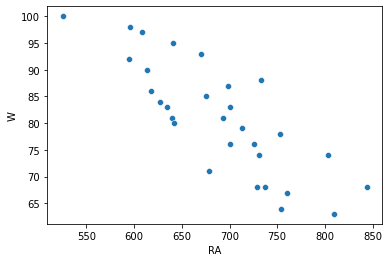

In [100]:
# RA vs win

sns.scatterplot('RA','W',data=df)

In [101]:
# Highly nehative correlated

<AxesSubplot:xlabel='ER', ylabel='W'>

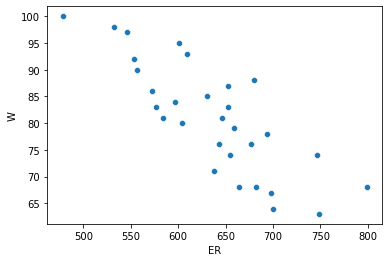

In [103]:
# ER vs Win

sns.scatterplot('ER','W',data=df)

In [104]:
#Highly negaticve correlated

<AxesSubplot:xlabel='ERA', ylabel='W'>

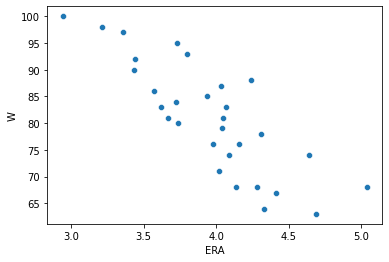

In [105]:
# ERA vs WIN

sns.scatterplot('ERA','W',data=df)

In [106]:
# highly negative correlated

<AxesSubplot:xlabel='CG', ylabel='W'>

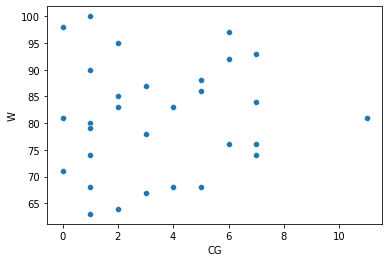

In [107]:
# CG vs WIN

sns.scatterplot('CG','W',data=df)

In [108]:
#  Very low correlated

<AxesSubplot:xlabel='SHO', ylabel='W'>

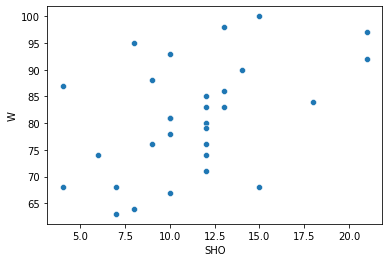

In [110]:
# SHO vs win

sns.scatterplot('SHO','W',data=df)

In [111]:
# positive correlated

<AxesSubplot:xlabel='SV', ylabel='W'>

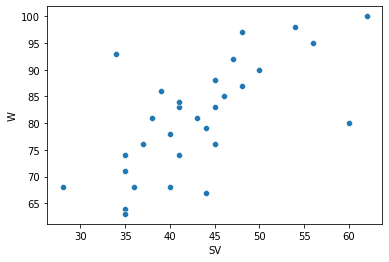

In [112]:
# SV vs win

sns.scatterplot('SV','W',data=df)

In [113]:
# positive correlated

<AxesSubplot:xlabel='E', ylabel='W'>

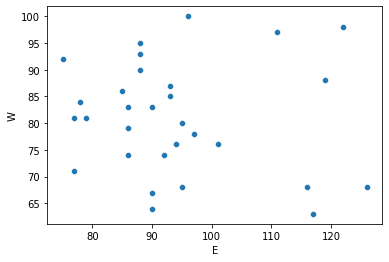

In [114]:
# E vs win

sns.scatterplot('E','W',data=df)

In [115]:
# very low correlated

# Conclusion:   Within features  some are very low correlated with target variable and some are highly negative correlated.
    Also, multicolinearity is also available, some independent feature are highly correlated to each other

In [116]:
df.columns

Index(['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA',
       'CG', 'SHO', 'SV', 'E', 'W'],
      dtype='object')

In [117]:
df.head(3)

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E,W
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88,95
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86,83
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79,81


In [138]:
# Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, 
# Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

#R – Runs scored: number of times a player crosses home plate
#AB – At bat: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction
#H – Hit: reaching base because of a batted, fair ball without error by the defense
#2B – Double: hits on which the batter reaches second base safely without the contribution of a fielding error
#3B – Triple: hits on which the batter reaches third base safely without the contribution of a fielding error
#HR – Home runs: hits on which the batter successfully touched all four bases, without the contribution of a fielding error
#BB – Base on balls (also called a "walk"): hitter not swinging at four pitches called out of the strike zone and awarded first base.
#SB – Stolen base: number of bases advanced by the runner while the ball is in the possession of the defense
#RA - Opponents runs scored
#ER - Earned runs allowed
#ERA - Earned run average
#CG - Complete games
# SHO - Shutouts  /To achieve a shutout, a pitcher must pitch a complete game without allowing the other team to score a run.
# SV - Saves
# E - Errors

<AxesSubplot:xlabel='R', ylabel='W'>

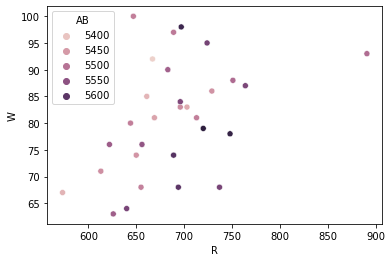

In [139]:
sns.scatterplot('R','W',hue='AB',data=df)  # AB- At bats

In [140]:
df.head(50)

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E,W
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88,95
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86,83
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79,81
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101,76
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86,74
5,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88,93
6,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93,87
7,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77,81
8,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95,80
9,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97,78


# Unique values

In [129]:
for i in df.columns:
    df[i].nunique()
    print("unique values of feature ",i, '= ',df[i].nunique())

unique values of feature  R =  28
unique values of feature  AB =  29
unique values of feature  H =  29
unique values of feature  2B =  22
unique values of feature  3B =  23
unique values of feature  HR =  27
unique values of feature  BB =  29
unique values of feature  SO =  29
unique values of feature  SB =  27
unique values of feature  RA =  30
unique values of feature  ER =  30
unique values of feature  ERA =  30
unique values of feature  CG =  9
unique values of feature  SHO =  12
unique values of feature  SV =  20
unique values of feature  E =  21
unique values of feature  W =  24


In [130]:
df.CG.unique()

array([ 2, 11,  7,  3,  0,  1,  5,  6,  4], dtype=int64)

<AxesSubplot:xlabel='R', ylabel='W'>

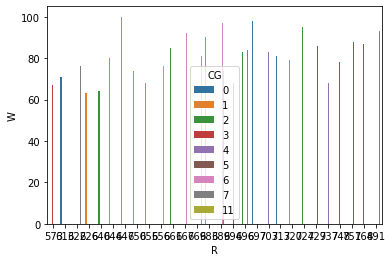

In [133]:
sns.barplot(x='R',y='W',='CG',data=df)

<AxesSubplot:xlabel='R', ylabel='W'>

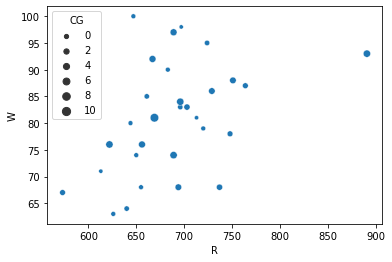

In [134]:
sns.scatterplot('R','W',size='CG',data=df)

<AxesSubplot:xlabel='CG', ylabel='W'>

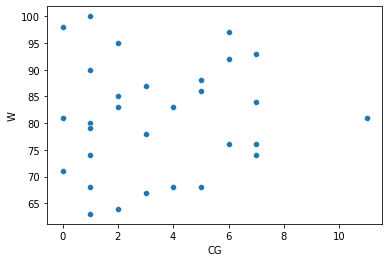

In [135]:
sns.scatterplot('CG','W',data=df)

In [136]:
# COmplete Game has no correlation with WIN, There are chances where you played complete game and not won all matches

# A pitcher earns a complete game if he pitches the entire game for his team regardless of how long it lasts. 

<AxesSubplot:xlabel='ER', ylabel='RA'>

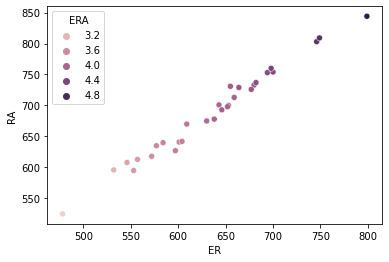

In [142]:
sns.scatterplot('ER', 'RA', hue='ERA',data=df)

In [141]:
#RA - Opponents runs scored
#ER - Earned runs allowed
#ERA - Earned run average

# Earned runs is the key counting statistic used in ERA, the most widely accepted barometer of a pitcher's success. If there are no errors or passed balls in a given inning or game, all the runs in that inning or game are earned runs.

# RA and ER seems the same thing menas, RA - run scored by opponent and ER earned run allowed without any errors>

# VIF to find multicolinearity

In [144]:
v= df.drop('W', axis=1)

In [ ]:
vif=pd.DataFrame()
